# Hexdropper Tutorial

This tutorial demonstrates the use of `hexdropper` to extract the hex color code from a cropped image, which can then be used to create complimentary graphics. Rather than using multiple external tools to obtain the necessary hex code to better customize one's graphics or visualization, we developed a package that would make it easier for users to directly obtain the desired hex code right here in Python.

Here, we demonstrate an example using the UBC MDS Logo. We aim to determin its hex color code, which we will then use as an input to a matplotlib object to create a complimentary graphic. Here is the image we will be using for this tutorial.

![Cropped image of UBC MDS Logo](img/uncropped_img.png)

## Set up
First, we must import the required libraries.

In [1]:
from hexdropper import read_image
from hexdropper import most_common_rgb 
from hexdropper import rgb_to_hex
from hexdropper import create_color_image
from matplotlib import pyplot as plt
import numpy as np

## Read image
Start by reading in a cropped image containing the color we would like to match, using the `read_image` function and specifying the path to the image on the device. The image does not need to be perfectly cropped, as long as the color we are interested in is most prominent.

In [11]:
image = read_image.read_image('img/cropped_img.jpg')

Note that the input image must be of type **jpg** or any other color formats that only have 3 color channels. Formats like png have 4 channels (RGB and an alpha channel that controls transparency). 

## Obtain the most common RGB
Now that the cropped image has been imported as an array, we can extract its RGB values. 

Sometimes, it might not be feasible to crop an image perfectly. For instance, a user may have missed a few dark pixels at the edge of the cropped image, or perhaps, the image itself is a bit noisy. To account for these situations, the function `most_common_rgb` takes the most common RGB value in the cropped image and outputs it as a tuple that corresponds to the red, green, and blue channels respectively.

In [15]:
rgb_val = most_common_rgb(image)
print(f"This is the most common set of RGB value in the cropped image: {rgb_val}")

This is the most common set of RGB value in the cropped image: (8, 181, 213)


We can check that the output matches the correct color: 

![Check the output with a color picker](img/rgb_color.png)

## Convert RGB to hexadecimal format

Once we have obtained the most common RGB value from an image using the most_common_rgb function, the next step might be to convert this RGB value to a more universally recognized color format - hexadecimal. This is where the `rgb_to_hex` function comes in. It efficiently converts RGB color values to their corresponding hexadecimal color codes. This is especially useful in contexts such as web design or graphic editing, where colors are often specified in hexadecimal format.

The `rgb_to_hex` function can accept either three separate integers representing the red, green, and blue color channels, or a single tuple containing these three integers. It returns a string representing the color in hexadecimal format.

#### Example 1: Passing separate integers
We can pass the RGB values as three separate arguments to the rgb_to_hex function. Given the most common RGB value in your cropped image is (8, 181, 212), the call to the function would look like this:

In [5]:
rgb_to_hex(8, 181, 212)

'#08B5D4'

#### Example 2: Passing a single tuple
We can also pass the RGB values as a single tuple. This is particularly useful if you already have the RGB values grouped together in a tuple format, as with the output from the `most_common_rgb` function. 

In [12]:
rgb_to_hex(rgb_val)

'#08B5D4'

Both methods will yield the same result `#08B5D4`, which is the hexadecimal representation of the color with RGB values `(8, 181, 212)`. The choice between separate integers and a single tuple depends on how the data is structured in your application.

## Use the hexcode to create complimentary visualizations!
Now that we know the hexcode of MDS logo, we can create visualizations that are a perfect color match. Here is an example using `matplotlib` specifying the hexcode as a parameter.

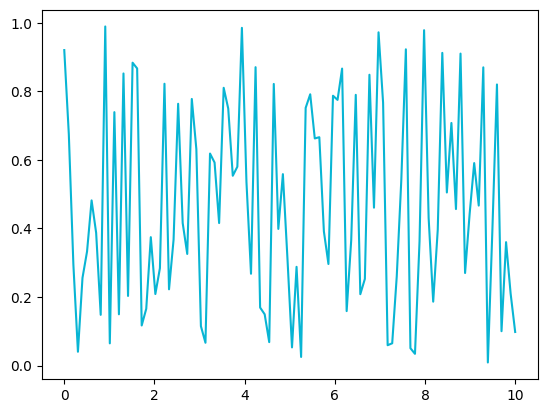

In [14]:
x = np.linspace(0,10,100)
y = np.random.rand(len(x))
hex_code = rgb_to_hex(rgb_val)
plt.plot(x, y, hex_code)

## Export the extrated color as an image

Now, we can use this color code to create a new image. This image will solely feature the extracted color. This can help us have a visual reference of the color for other users (particularly if they do not have a programming background) when designing graphics that coordinate with MDS logo's color scheme.

By default, the function will create a 200x200 pixel image with the extrated color. The image will be saved in the current working directory and named with the color code (e.g., 08B5D4.png).

In [8]:
create_color_image(hex_code)

We can also change the size of the image or the location where it is saved, we can do so by adjusting the parameters of the `create_color_image` function.

In [9]:
# Create a 100x100 pixel image and save it to a specific path
create_color_image(hex_code, image_size=(100, 100), output_path='/path/to/save/08B5D4.png')

## Conclusion

Through this tutorial, we've demonstrated how to use the `hexdropper` package to extract color from a given image and use the color for visualizations or color reference. This package can be especially useful for designers and developers who need visuals that match or complement colors extracted from images, as demonstrated with the UBC MDS Logo in our example.

If you have any questions or feedback about `hexdropper`, feel free to reach out or contribute to our project. Happy color dropping!